# AmExpert 2019 – Machine Learning Hackathon


## Introduction
American Express and Analytics Vidhya presents “AmExpert 2019 – Machine Learning Hackathon”. An amazing opportunity to showcase your analytical abilities and talent.

Get a taste of the kind of challenges we face here at American Express on day to day basis.

Exciting prizes up for grabs! Best performers also get a chance to get interviewed by American Express for analytics roles!

Don’t hold on to the buzzing ideas in your mind. Just wear your thinking hats and display the spectrum of your creativity!


# Problem Statement

## Predicting Coupon Redemption

XYZ Credit Card company regularly helps it’s merchants understand their data better and take key business decisions accurately by providing machine learning and analytics consulting. ABC is an established Brick & Mortar retailer that frequently conducts marketing campaigns for its diverse product range. As a merchant of XYZ, they have sought XYZ to assist them in their discount marketing process using the power of machine learning. Can you wear the AmExpert hat and help out ABC?

 
Discount marketing and coupon usage are very widely used promotional techniques to attract new customers and to retain & reinforce loyalty of existing customers. The measurement of a consumer’s propensity towards coupon usage and the prediction of the redemption behaviour are crucial parameters in assessing the effectiveness of a marketing campaign.

 
ABC’s promotions are shared across various channels including email, notifications, etc. A number of these campaigns include coupon discounts that are offered for a specific product/range of products. The retailer would like the ability to predict whether customers redeem the coupons received across channels, which will enable the retailer’s marketing team to accurately design coupon construct, and develop more precise and targeted marketing strategies.

 
The data available in this problem contains the following information, including the details of a sample of campaigns and coupons used in previous campaigns -

**User Demographic Details**

**Campaign and coupon Details**

**Product details**

**Previous transactions**


Based on previous transaction & performance data from the last 18 campaigns, predict the probability for the next 10 campaigns in the test set for each coupon and customer combination, whether the customer will redeem the coupon or not?

 

### Dataset Description

Here is the schema for the different data tables available. The detailed data dictionary is provided next.


(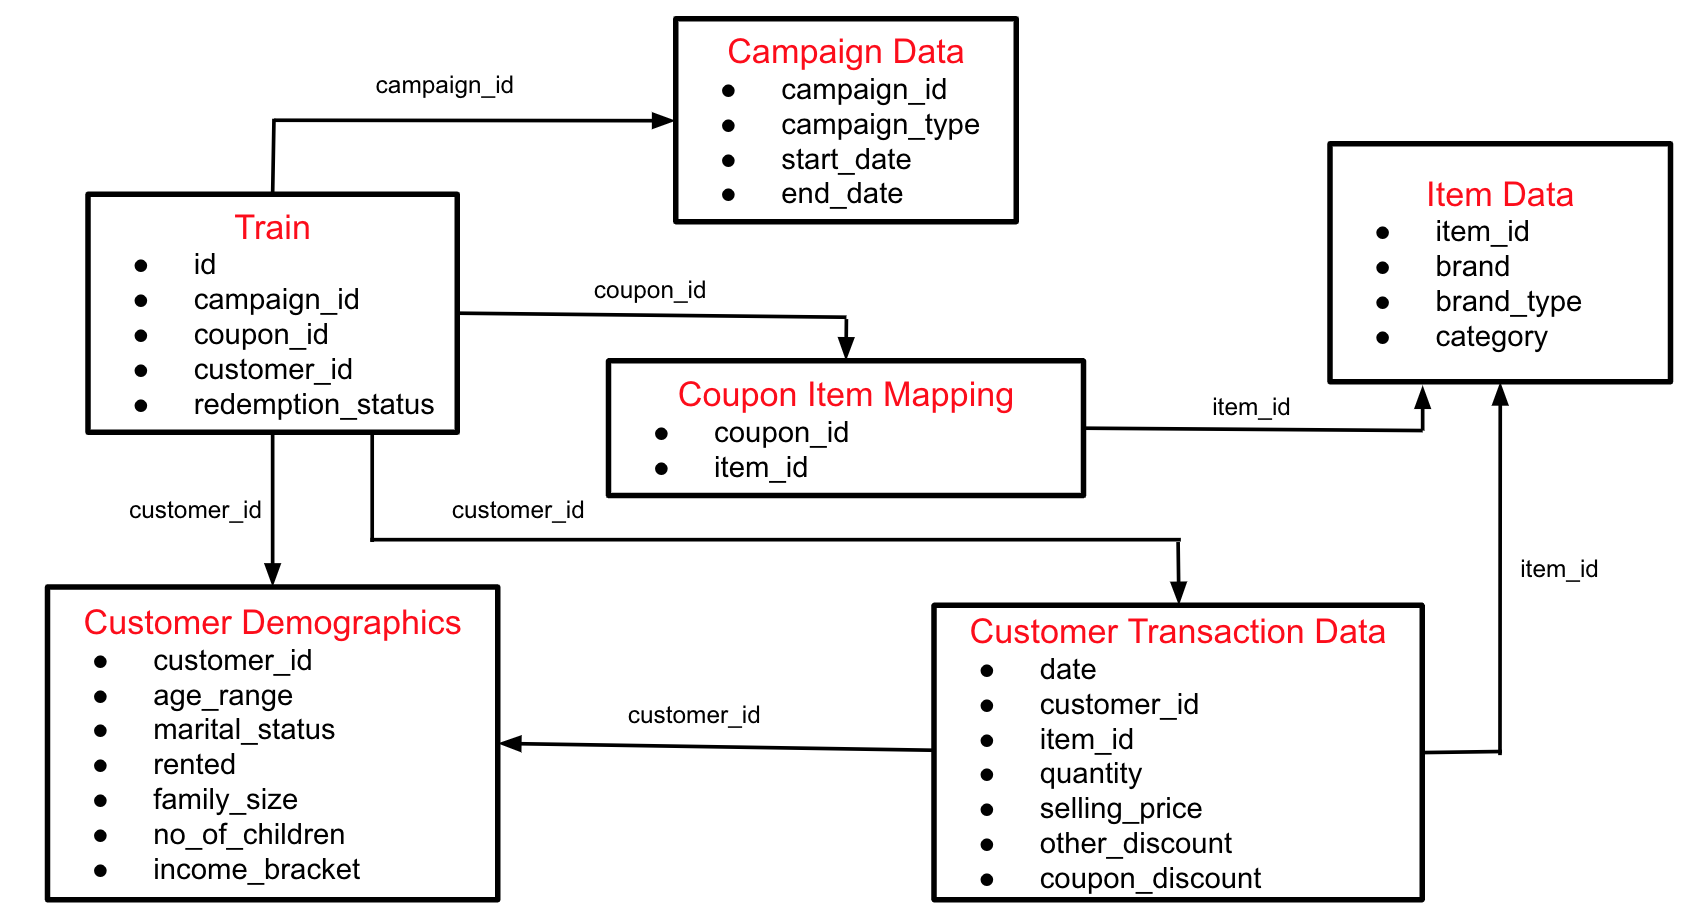)

You are provided with the following files in train.zip:

**train.csv:** Train data containing the coupons offered to the given customers under the 18 campaigns

|Variable |Definition |
|----|----|
|id	|Unique id for coupon customer impression|
|campaign_id	|Unique id for a discount campaign|
|coupon_id	|Unique id for a discount coupon|
|customer_id	|Unique id for a customer|
|redemption_status|	(target) (0 - Coupon not redeemed, 1 - Coupon redeemed) |


**campaign_data.csv:** Campaign information for each of the 28 campaigns

|Variable|	Definition|
|----|----|
|campaign_id	|Unique id for a discount campaign|
|campaign_type	|Anonymised Campaign Type (X/Y)|
|start_date	|Campaign Start Date|
|end_date	|Campaign End Date |


**coupon_item_mapping.csv:** Mapping of coupon and items valid for discount under that coupon

|Variable|	Definition|
|----|----|
|coupon_id	|Unique id for a discount coupon (no order)|
|item_id	|Unique id for items for which given coupon is valid (no order) |


**customer_demographics.csv:** Customer demographic information for some customers

|Variable	|Definition|
|----|----|
|customer_id	|Unique id for a customer|
|age_range	|Age range of customer family in years|
|marital_status|	Married/Single|
|rented|	0 - not rented accommodation, 1 - rented accommodation|
|family_size|	Number of family members|
|no_of_children	|Number of children in the family|
|income_bracket|	Label Encoded Income Bracket (Higher income corresponds to higher number) |


**customer_transaction_data.csv:** Transaction data for all customers for duration of campaigns in the train data

|Variable	|Definition|
|----|----|
|date	|Date of Transaction|
|customer_id|Unique id for a customer|
|item_id|	Unique id for item|
|quantity	|quantity of item bought|
|selling_price	|Sales value of the transaction|
|other_discount|	Discount from other sources such as manufacturer coupon/loyalty card|
|coupon_discount|	Discount availed from retailer coupon |


**item_data.csv:** Item information for each item sold by the retailer

|Variable|	Definition|
|----|----|
|item_id|	Unique id for itemv
|brand	|Unique id for item brand|
|brand_type	|Brand Type (local/Established)|
|category	|Item Category |


**test.csv:** Contains the coupon customer combination for which redemption status is to be predicted

|Variable|	Definition|
|----|----|
|id	|Unique id for coupon customer impression|
|campaign_id	|Unique id for a discount campaign|
|coupon_id	|Unique id for a discount coupon|
|customer_id	|Unique id for a customer |

*Campaign, coupon and customer data for test set is also contained in train.zip *

**sample_submission.csv:** This file contains the format in which you have to submit your predictions.

To summarise the entire process:

* Customers receive coupons under various campaigns and may choose to redeem it.
* They can redeem the given coupon for any valid product for that coupon as per coupon item mapping within the duration between campaign start date and end date
* Next, the customer will redeem the coupon for an item at the retailer store and that will reflect in the transaction table in the column coupon_discount.
 
### Evaluation Metric
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.
 

### Public and Private Split
* Test data is further randomly divided into Public (40%) and Private data (60%)
* Your initial responses will be checked and scored on the Public data.
* The final rankings would be based on your private score which will be published once the competition is over.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
aimport pandas_profiling


In [157]:
train=pd.read_csv('train.csv')
s=pd.read_csv('sample_submission_Byiv0dS.csv')
coup_item=pd.read_csv('coupon_item_mapping.csv')
test=pd.read_csv('test.csv')
comp=pd.read_csv('campaign_data.csv')
tran=pd.read_csv('customer_transaction_data.csv')
demo=pd.read_csv('customer_demographics.csv')  # Avoided to many null values
item=pd.read_csv('item_data.csv')
print(train.shape,test.shape,coup_item.shape,comp.shape,tran.shape,demo.shape,item.shape)


(78369, 5) (50226, 4) (92663, 2) (28, 4) (1324566, 7) (760, 7) (74066, 4)


In [158]:
pandas_profiling.ProfileReport(train)

C:\Users\aasth\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,5
Number of observations,78369
Total Missing (%),0.0%
Total size in memory,3.0 MiB
Average record size in memory,40.0 B
Numeric,4
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [159]:
pandas_profiling.ProfileReport(tran)

C:\Users\aasth\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,7
Number of observations,1324566
Total Missing (%),0.0%
Total size in memory,70.7 MiB
Average record size in memory,56.0 B
Numeric,6
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [160]:
pandas_profiling.ProfileReport(coup_item)

C:\Users\aasth\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,2
Number of observations,92663
Total Missing (%),0.0%
Total size in memory,1.4 MiB
Average record size in memory,16.0 B
Numeric,2
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [161]:
pandas_profiling.ProfileReport(item)

C:\Users\aasth\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,4
Number of observations,74066
Total Missing (%),0.0%
Total size in memory,2.3 MiB
Average record size in memory,32.0 B
Numeric,2
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [44]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [45]:
print(train.shape)
train.redemption_status.value_counts()

(78369, 5)


0    77640
1      729
Name: redemption_status, dtype: int64

In [46]:
print(comp.shape)
comp.head(28)

(28, 4)


,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13
5,22,X,16/09/13,18/10/13
6,18,X,10/08/13,04/10/13
7,19,Y,26/08/13,27/09/13
8,17,Y,29/07/13,30/08/13
9,16,Y,15/07/13,16/08/13


In [47]:
test.head()

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811


In [48]:
df=train.append(test,ignore_index=True)
df.head()

,campaign_id,coupon_id,customer_id,id,redemption_status
0,13,27,1053,1,0.0
1,13,116,48,2,0.0
2,9,635,205,6,0.0
3,13,644,1050,7,0.0
4,8,1017,1489,9,0.0


In [49]:
df.shape

(128595, 5)

In [50]:
comp['start_date']=pd.to_datetime(comp['start_date'],format='%d/%m/%y',dayfirst=True)
comp['end_date']=pd.to_datetime(comp['end_date'],format='%d/%m/%y',dayfirst=True)


In [51]:
comp['diff_d']=(comp['end_date']-comp['start_date'])/np.timedelta64(1,'D')
comp['diff_m']=(comp['end_date']-comp['start_date'])/np.timedelta64(1,'M')
comp['diff_w']=(comp['end_date']-comp['start_date'])/np.timedelta64(1,'W')


In [52]:
comp.head()

,campaign_id,campaign_type,start_date,end_date,diff_d,diff_m,diff_w
0,24,Y,2013-10-21,2013-12-20,60.0,1.971293,8.571429
1,25,Y,2013-10-21,2013-11-22,32.0,1.051356,4.571429
2,20,Y,2013-09-07,2013-11-16,70.0,2.299842,10.000000
3,23,Y,2013-10-08,2013-11-15,38.0,1.248486,5.428571
4,21,Y,2013-09-16,2013-10-18,32.0,1.051356,4.571429


In [53]:
comp.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
campaign_id,28,NaN,NaN,NaN,NaT,NaT,15.5714,9.11827,1,7.75,16.5,23.25,30
campaign_type,28,2,Y,22,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_date,28,25,2013-04-22 00:00:00,2,2012-08-12,2013-10-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_date,28,26,2013-10-18 00:00:00,2,2012-09-21,2013-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diff_d,28,NaN,NaN,NaN,NaT,NaT,41.8571,11.9589,32,32,35.5,49.25,70
diff_m,28,NaN,NaN,NaN,NaT,NaT,1.37521,0.392909,1.05136,1.05136,1.16635,1.6181,2.29984
diff_w,28,NaN,NaN,NaN,NaT,NaT,5.97959,1.70842,4.57143,4.57143,5.07143,7.03571,10


In [54]:
df.isnull().sum()

campaign_id              0
coupon_id                0
customer_id              0
id                       0
redemption_status    50226
dtype: int64

In [55]:
df=df.merge(comp,on='campaign_id',how='left')
df.head()

,campaign_id,coupon_id,customer_id,id,redemption_status,campaign_type,start_date,end_date,diff_d,diff_m,diff_w
0,13,27,1053,1,0.0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286
1,13,116,48,2,0.0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286
2,9,635,205,6,0.0,Y,2013-03-11,2013-04-12,32.0,1.051356,4.571429
3,13,644,1050,7,0.0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286
4,8,1017,1489,9,0.0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143


In [56]:
for j in ['brand', 'brand_type', 'category']:
    print(j,item[j].nunique())

brand 5528
brand_type 2
category 19


In [57]:
for j in ['brand', 'brand_type', 'category']:
    item[j] = item[j].astype('category')

coup_item = pd.merge(coup_item,item, on = 'item_id',how = 'left')

In [58]:
coup_item.coupon_id.nunique()

1116

In [59]:
coup_item.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,107,75,56,Local,Grocery
2,494,76,209,Established,Grocery
3,522,77,278,Established,Grocery
4,518,77,278,Established,Grocery


In [60]:
coup_item.shape

(92663, 5)

In [61]:
tran['date']=pd.to_datetime(tran['date'],format='%Y-%m-%d')
tran['date_d']=tran['date'].dt.day.astype('category')
tran['date_m']=tran['date'].dt.month.astype('category')
tran['date_w']=tran['date'].dt.week.astype('category')


In [62]:
tran.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,date_d,date_m,date_w
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,2,1,1
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,2,1,1
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,2,1,1


In [63]:
tran[tran['quantity']==20]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,date_d,date_m,date_w
2257,2012-01-11,632,36682,20,156.73,-21.37,0.0,11,1,2
30413,2012-02-22,1324,9561,20,626.91,-505.80,0.0,22,2,8
35980,2012-02-28,757,25460,20,118.61,-2.49,0.0,28,2,9
60726,2012-03-17,1239,18151,20,142.48,0.00,0.0,17,3,11
82841,2012-03-31,767,37397,20,277.84,0.00,0.0,31,3,13
...,...,...,...,...,...,...,...,...,...,...
1280892,2013-06-16,1483,20360,20,142.48,0.00,0.0,16,6,24
1281796,2013-06-17,811,5873,20,121.11,0.00,0.0,17,6,25
1285318,2013-06-18,132,20360,20,142.48,0.00,0.0,18,6,25
1309218,2013-06-28,362,72255,20,71.24,-35.62,0.0,28,6,26


In [64]:
tran['discount_bin']=tran['coupon_discount'].apply(lambda x: 0 if x>=0 else 1)

In [65]:
tran['marked_price']=tran['selling_price']-tran['other_discount']-tran['coupon_discount']

In [66]:
tran['disc_percent']=(tran['marked_price']-tran['selling_price'])/tran['selling_price']


In [67]:
tran['price_per_quan']=tran['marked_price']/tran['quantity']


In [68]:
tran['marked_by_sale']=tran['marked_price']/tran['selling_price']


In [69]:
tran.columns

Index(['date', 'customer_id', 'item_id', 'quantity', 'selling_price',
       'other_discount', 'coupon_discount', 'date_d', 'date_m', 'date_w',
       'discount_bin', 'marked_price', 'disc_percent', 'price_per_quan',
       'marked_by_sale'],
      dtype='object')

In [70]:
tran=tran.merge(coup_item,on='item_id',how='left')
tran.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,date_d,date_m,date_w,discount_bin,marked_price,disc_percent,price_per_quan,marked_by_sale,coupon_id,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,0,45.95,0.303176,45.95,1.303176,7.0,56,Local,Natural Products
1,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,0,45.95,0.303176,45.95,1.303176,20.0,56,Local,Natural Products
2,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,0,45.95,0.303176,45.95,1.303176,29.0,56,Local,Natural Products
3,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1,0,67.32,0.259966,67.32,1.259966,7.0,56,Local,Natural Products
4,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1,0,67.32,0.259966,67.32,1.259966,20.0,56,Local,Natural Products


In [71]:
print(tran.shape)
tran=tran[tran.duplicated()==False]
print(tran.shape,train.shape)
# --drop it

(2657495, 19)
(2650887, 19) (78369, 5)


In [72]:
tran.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,date_d,date_m,date_w,discount_bin,marked_price,disc_percent,price_per_quan,marked_by_sale,coupon_id,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,0,45.95,0.303176,45.95,1.303176,7.0,56,Local,Natural Products
1,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,0,45.95,0.303176,45.95,1.303176,20.0,56,Local,Natural Products
2,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,0,45.95,0.303176,45.95,1.303176,29.0,56,Local,Natural Products
3,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1,0,67.32,0.259966,67.32,1.259966,7.0,56,Local,Natural Products
4,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1,0,67.32,0.259966,67.32,1.259966,20.0,56,Local,Natural Products


In [73]:
tran=tran.merge(tran.groupby(['customer_id','date']).agg({'coupon_id':'count','item_id':'count','disc_percent':sum}).reset_index().rename(columns={'coupon_id':'coupon_aquired','item_id':'item_bought','disc_percent':'tot_disc'}),on=['customer_id','date'],how='left')

In [74]:
#g1 = tran.groupby(['customer_id','date']).agg({'coupon_id':'count','item_id':'count','disc_percent':sum}).reset_index()

In [75]:
#g1.head()

In [76]:
#g1.shape

In [77]:
#tran.shape

In [78]:
#tran = tran.merge(g1.rename(columns={'coupon_id':'coupon_aquired','item_id':'item_bought','disc_percent':'tot_disc'}),on = ['customer_id','date'],how = 'left') 

In [79]:
tran.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,date_d,date_m,date_w,...,disc_percent,price_per_quan,marked_by_sale,coupon_id,brand,brand_type,category,coupon_aquired,item_bought,tot_disc
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,...,0.303176,45.95,1.303176,7.0,56,Local,Natural Products,11,12,3.403242
1,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,...,0.303176,45.95,1.303176,20.0,56,Local,Natural Products,11,12,3.403242
2,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2,1,1,...,0.303176,45.95,1.303176,29.0,56,Local,Natural Products,11,12,3.403242
3,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1,...,0.259966,67.32,1.259966,7.0,56,Local,Natural Products,11,12,3.403242
4,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2,1,1,...,0.259966,67.32,1.259966,20.0,56,Local,Natural Products,11,12,3.403242


In [80]:
tran[(tran['customer_id']==1)]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,date_d,date_m,date_w,...,disc_percent,price_per_quan,marked_by_sale,coupon_id,brand,brand_type,category,coupon_aquired,item_bought,tot_disc
59989,2012-02-21,1,4953,1,142.12,0.00,0.0,21,2,8,...,0.000000,142.12,1.000000,864.0,1061,Established,Grocery,54,66,17.314655
59990,2012-02-21,1,4953,1,142.12,0.00,0.0,21,2,8,...,0.000000,142.12,1.000000,865.0,1061,Established,Grocery,54,66,17.314655
59991,2012-02-21,1,4953,1,142.12,0.00,0.0,21,2,8,...,0.000000,142.12,1.000000,866.0,1061,Established,Grocery,54,66,17.314655
59992,2012-02-21,1,5626,1,106.50,0.00,0.0,21,2,8,...,0.000000,106.50,1.000000,522.0,278,Established,Grocery,54,66,17.314655
59993,2012-02-21,1,5626,1,106.50,0.00,0.0,21,2,8,...,0.000000,106.50,1.000000,520.0,278,Established,Grocery,54,66,17.314655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636192,2013-06-30,1,45986,1,95.82,-5.34,0.0,30,6,26,...,0.055729,101.16,1.055729,868.0,1075,Established,Grocery,10,11,0.461751
2636193,2013-06-30,1,45986,1,95.82,-5.34,0.0,30,6,26,...,0.055729,101.16,1.055729,9.0,1075,Established,Grocery,10,11,0.461751
2636194,2013-06-30,1,45986,1,95.82,-5.34,0.0,30,6,26,...,0.055729,101.16,1.055729,872.0,1075,Established,Grocery,10,11,0.461751
2636195,2013-06-30,1,45986,1,95.82,-5.34,0.0,30,6,26,...,0.055729,101.16,1.055729,21.0,1075,Established,Grocery,10,11,0.461751


In [81]:
tran.shape

(2650887, 22)

In [82]:
tran['coupon_to_item']=tran['item_bought']-tran['coupon_aquired']

In [83]:
tran[(tran['customer_id']==413) & (tran['coupon_id']==577)]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,date_d,date_m,date_w,...,price_per_quan,marked_by_sale,coupon_id,brand,brand_type,category,coupon_aquired,item_bought,tot_disc,coupon_to_item
859832,2012-08-16,413,16887,1,110.07,0.0,0.0,16,8,33,...,110.07,1.0,577.0,408,Established,Pharmaceutical,13,22,2.389521,9


In [84]:
df.head()

,campaign_id,coupon_id,customer_id,id,redemption_status,campaign_type,start_date,end_date,diff_d,diff_m,diff_w
0,13,27,1053,1,0.0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286
1,13,116,48,2,0.0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286
2,9,635,205,6,0.0,Y,2013-03-11,2013-04-12,32.0,1.051356,4.571429
3,13,644,1050,7,0.0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286
4,8,1017,1489,9,0.0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143


In [85]:
ddf=df.merge(tran.groupby(['customer_id','coupon_id']).agg({'date':set,'discount_bin':sum,'quantity':sum,'item_id':'count',
                                                            'coupon_aquired':sum,'item_bought':'mean','tot_disc':sum}).reset_index(),on=['customer_id','coupon_id'],how='left')
ddf.sample(10)

,campaign_id,coupon_id,customer_id,id,redemption_status,campaign_type,start_date,end_date,diff_d,diff_m,diff_w,date,discount_bin,quantity,item_id,coupon_aquired,item_bought,tot_disc
18965,8,885,485,31233,0.0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62877,8,846,1364,103334,0.0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22349,2,347,222,36672,0.0,Y,2012-12-17,2013-01-18,32.0,1.051356,4.571429,"{2012-10-15 00:00:00, 2013-01-23 00:00:00, 201...",0.0,4.0,4.0,106.0,32.25,29.878442
23143,13,530,1386,37923,0.0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,"{2012-12-30 00:00:00, 2012-07-29 00:00:00}",0.0,2.0,2.0,76.0,43.00,17.583627
51553,12,496,1232,84611,0.0,Y,2013-04-22,2013-05-24,32.0,1.051356,4.571429,{2012-10-10 00:00:00},0.0,1.0,1.0,55.0,70.00,10.322511
50465,8,583,1189,82749,0.0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3472,11,759,862,5807,0.0,Y,2013-04-22,2013-06-07,46.0,1.511325,6.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43941,26,545,1070,72092,0.0,X,2012-08-12,2012-09-21,40.0,1.314195,5.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53502,8,465,736,87909,0.0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50229,13,115,169,82371,0.0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
g2 = tran.groupby(['customer_id','coupon_id']).agg({'date':set,'discount_bin':sum,'quantity':sum,'item_id':'count',
                                                            'coupon_aquired':sum,'item_bought':'mean','tot_disc':sum}).reset_index()

In [87]:
g2.head()

,customer_id,coupon_id,date,discount_bin,quantity,item_id,coupon_aquired,item_bought,tot_disc
0,1,1.0,"{2013-03-12 00:00:00, 2012-10-18 00:00:00}",0,2,2,104,70.500000,38.398568
1,1,6.0,"{2012-09-03 00:00:00, 2012-12-18 00:00:00, 201...",2,41,39,1796,60.025641,584.441750
2,1,7.0,"{2013-03-12 00:00:00, 2012-06-14 00:00:00, 201...",0,13,13,602,60.692308,166.241801
3,1,8.0,"{2012-09-03 00:00:00, 2012-07-30 00:00:00, 201...",8,90,82,3406,54.402439,1044.053652
4,1,9.0,"{2012-05-26 00:00:00, 2012-03-08 00:00:00, 201...",1,50,49,1835,48.632653,577.328497


In [88]:
ddf = df.merge(g2,on=['customer_id','coupon_id'],how='left')

In [89]:
ddf.head(10)

,campaign_id,coupon_id,customer_id,id,redemption_status,campaign_type,start_date,end_date,diff_d,diff_m,diff_w,date,discount_bin,quantity,item_id,coupon_aquired,item_bought,tot_disc
0,13,27,1053,1,0.0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13,116,48,2,0.0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,635,205,6,0.0,Y,2013-03-11,2013-04-12,32.0,1.051356,4.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,644,1050,7,0.0,X,2013-05-19,2013-07-05,47.0,1.544180,6.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,1017,1489,9,0.0,X,2013-02-16,2013-04-05,48.0,1.577034,6.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11,795,793,11,0.0,Y,2013-04-22,2013-06-07,46.0,1.511325,6.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9,444,590,14,0.0,Y,2013-03-11,2013-04-12,32.0,1.051356,4.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,29,538,368,15,0.0,Y,2012-10-08,2012-11-30,53.0,1.741309,7.571429,{2013-05-30 00:00:00},0.0,2.0,2.0,200.0,120.0,51.022094
8,30,857,523,17,0.0,X,2012-11-19,2013-01-04,46.0,1.511325,6.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,559,679,19,0.0,Y,2012-12-17,2013-01-18,32.0,1.051356,4.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
ddf['coupon_aquired'].fillna(0)

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
128590      0.0
128591    216.0
128592    391.0
128593     62.0
128594      0.0
Name: coupon_aquired, Length: 128595, dtype: float64

In [91]:
print(ddf.shape)
ddf['date'].replace(np.nan,0,inplace=True)
ddf['discount_bin'].replace(np.nan,-1,inplace=True)


(128595, 18)


In [92]:
df['within_date']=ddf['date'].apply(lambda x: len(x) if x !=0 else 0)

In [93]:
c=['count','nunique']
n=['mean','max','min','sum','std']
nn=['mean','max','min','sum','std','quantile']
agg_c={'date_d':c,'date_m':c,'date_w':c,'quantity':n,'selling_price':n,'other_discount':n,'coupon_discount':n,'item_id':c,'brand':c,
       'category':c,'coupon_id':c,'discount_bin':nn,'marked_price':n,'disc_percent':n,'price_per_quan':n,'brand_type':c,'marked_by_sale':n,
       'coupon_aquired':nn, 'item_bought':nn, 'tot_disc':n, 'coupon_to_item':nn}
trans=tran.groupby(['customer_id']).agg(agg_c)
trans.head()

date_d         date_m         date_w           quantity         \
             count nunique  count nunique  count nunique       mean    max   
customer_id                                                                  
1             2206      28   2206      12   2206      38   1.133726      5   
2              823      19    823      11    823      27   1.117861      5   
3             1351      23   1351      12   1351      30   6.861584   6949   
4              451      23    451      11    451      21   1.283814      5   
5             1594      31   1594      12   1594      51  59.345671  14638   

                        ...   tot_disc                                \
            min    sum  ...        max  min           sum        std   
customer_id             ...                                            
1             1   2501  ...  30.803886  0.0  29544.403002   6.798600   
2             1    920  ...  16.836933  0.0   6242.841276   5.037921   
3             1   9270  ...  46.132935  0.0  22281.617402  12.410100   
4             1    579  ...  13.875339  0.0   1927.087224   4.159218   
5             1  94597  ...  14.588230  0.0   3806.955362   3.228779   

            coupon_to_item                                    
                      mean max min    sum       std quantile  
customer_id                                                   
1                13.276065  23   0  29287  5.671542     14.0  
2                 7.814095  20   0   6431  6.097201      6.0  
3                13.960030  35   0  18860  9.525554     12.0  
4                 6.374723  13   0   2875  4.604267      4.0  
5                 2.474279  11   0   3944  2.351349      2.0  

[5 rows x 85 columns]

In [94]:
trans.columns=['F_' + '_'.join(col).strip() for col in trans.columns.values]
trans.reset_index(inplace=True)
trans.head()

,customer_id,F_date_d_count,F_date_d_nunique,F_date_m_count,F_date_m_nunique,F_date_w_count,F_date_w_nunique,F_quantity_mean,F_quantity_max,F_quantity_min,...,F_tot_disc_max,F_tot_disc_min,F_tot_disc_sum,F_tot_disc_std,F_coupon_to_item_mean,F_coupon_to_item_max,F_coupon_to_item_min,F_coupon_to_item_sum,F_coupon_to_item_std,F_coupon_to_item_quantile
0,1,2206,28,2206,12,2206,38,1.133726,5,1,...,30.803886,0.0,29544.403002,6.798600,13.276065,23,0,29287,5.671542,14.0
1,2,823,19,823,11,823,27,1.117861,5,1,...,16.836933,0.0,6242.841276,5.037921,7.814095,20,0,6431,6.097201,6.0
2,3,1351,23,1351,12,1351,30,6.861584,6949,1,...,46.132935,0.0,22281.617402,12.410100,13.960030,35,0,18860,9.525554,12.0
3,4,451,23,451,11,451,21,1.283814,5,1,...,13.875339,0.0,1927.087224,4.159218,6.374723,13,0,2875,4.604267,4.0
4,5,1594,31,1594,12,1594,51,59.345671,14638,1,...,14.588230,0.0,3806.955362,3.228779,2.474279,11,0,3944,2.351349,2.0


In [95]:
trans.shape

(1582, 86)

In [96]:
df['campaign_type']=df['campaign_type'].astype('category')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128595 entries, 0 to 128594
Data columns (total 97 columns):
campaign_id                  128595 non-null int64
coupon_id                    128595 non-null int64
customer_id                  128595 non-null int64
id                           128595 non-null int64
redemption_status            78369 non-null float64
campaign_type                128595 non-null category
start_date                   128595 non-null datetime64[ns]
end_date                     128595 non-null datetime64[ns]
diff_d                       128595 non-null float64
diff_m                       128595 non-null float64
diff_w                       128595 non-null float64
within_date                  128595 non-null int64
F_date_d_count               128595 non-null int64
F_date_d_nunique             128595 non-null int64
F_date_m_count               128595 non-null int64
F_date_m_nunique             128595 non-null int64
F_date_w_count               128595 non-null 

In [98]:
df=df.merge(trans,on=['customer_id'],how='left')


# -------to uncomment

# df.head()

In [102]:
df_train=df[df['redemption_status'].isnull()==False]
df_test=df[df['redemption_status'].isnull()==True]

print(df_train.shape,df_test.shape)

(78369, 97) (50226, 97)


In [103]:
df_train.head()

,campaign_id,coupon_id,customer_id,id,redemption_status,campaign_type,start_date,end_date,diff_d,diff_m,...,F_tot_disc_max,F_tot_disc_min,F_tot_disc_sum,F_tot_disc_std,F_coupon_to_item_mean,F_coupon_to_item_max,F_coupon_to_item_min,F_coupon_to_item_sum,F_coupon_to_item_std,F_coupon_to_item_quantile
0,13,27,1053,1,0.0,X,2013-05-19,2013-07-05,47.0,1.544180,...,25.299571,0.0,3726.606858,6.933636,3.557377,11,0,2170,2.926716,3.0
1,13,116,48,2,0.0,X,2013-05-19,2013-07-05,47.0,1.544180,...,26.396693,0.0,5782.394539,5.923689,4.081657,12,0,3449,3.513239,3.0
2,9,635,205,6,0.0,Y,2013-03-11,2013-04-12,32.0,1.051356,...,31.048193,0.0,20661.682063,8.413077,6.201689,17,0,12484,3.981450,5.0
3,13,644,1050,7,0.0,X,2013-05-19,2013-07-05,47.0,1.544180,...,15.389234,0.0,2330.378707,5.263748,4.722467,17,0,2144,5.112645,3.0
4,8,1017,1489,9,0.0,X,2013-02-16,2013-04-05,48.0,1.577034,...,21.025491,0.0,5292.920898,5.279210,3.930000,10,0,3930,2.586463,4.0


In [104]:
df_train.merge(df_train.drop(['id','redemption_status'],axis=1).groupby('campaign_id').mean().reset_index(),on='campaign_id',how='left')

,campaign_id,coupon_id_x,customer_id_x,id,redemption_status,campaign_type,start_date,end_date,diff_d_x,diff_m_x,...,F_tot_disc_max_y,F_tot_disc_min_y,F_tot_disc_sum_y,F_tot_disc_std_y,F_coupon_to_item_mean_y,F_coupon_to_item_max_y,F_coupon_to_item_min_y,F_coupon_to_item_sum_y,F_coupon_to_item_std_y,F_coupon_to_item_quantile_y
0,13,27,1053,1,0.0,X,2013-05-19,2013-07-05,47.0,1.544180,...,33.552230,0.003844,22777.589335,8.323239,7.638486,21.502875,0.021233,17797.572591,5.573441,6.509931
1,13,116,48,2,0.0,X,2013-05-19,2013-07-05,47.0,1.544180,...,33.552230,0.003844,22777.589335,8.323239,7.638486,21.502875,0.021233,17797.572591,5.573441,6.509931
2,9,635,205,6,0.0,Y,2013-03-11,2013-04-12,32.0,1.051356,...,33.359071,0.009611,23196.832997,8.582874,7.262253,19.761364,0.028409,16053.545455,5.015611,6.281250
3,13,644,1050,7,0.0,X,2013-05-19,2013-07-05,47.0,1.544180,...,33.552230,0.003844,22777.589335,8.323239,7.638486,21.502875,0.021233,17797.572591,5.573441,6.509931
4,8,1017,1489,9,0.0,X,2013-02-16,2013-04-05,48.0,1.577034,...,32.011696,0.004153,21276.398491,8.122024,7.581794,20.875460,0.021459,16666.729905,5.472313,6.557127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78364,8,71,1523,128587,0.0,X,2013-02-16,2013-04-05,48.0,1.577034,...,32.011696,0.004153,21276.398491,8.122024,7.581794,20.875460,0.021459,16666.729905,5.472313,6.557127
78365,30,547,937,128589,0.0,X,2012-11-19,2013-01-04,46.0,1.511325,...,35.776467,0.003922,24342.696046,8.920721,7.579016,20.785527,0.018710,17979.403433,5.513836,6.445493
78366,8,754,1004,128590,0.0,X,2013-02-16,2013-04-05,48.0,1.577034,...,32.011696,0.004153,21276.398491,8.122024,7.581794,20.875460,0.021459,16666.729905,5.472313,6.557127
78367,13,134,71,128592,0.0,X,2013-05-19,2013-07-05,47.0,1.544180,...,33.552230,0.003844,22777.589335,8.323239,7.638486,21.502875,0.021233,17797.572591,5.573441,6.509931


In [110]:
df_train=df_train.merge(df_train.drop(['id','redemption_status'],axis=1).groupby('coupon_id').mean().reset_index(),on='coupon_id',how='left')
df_test=df_test.merge(df_test.drop(['id','redemption_status'],axis=1).groupby('coupon_id').mean().reset_index(),on='coupon_id',how='left')


In [111]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

In [112]:
col_to_drop=['id','redemption_status','start_date','end_date']

X,y=df_train.drop(col_to_drop,axis=1),df_train['redemption_status']
Xtest=df_test.drop(col_to_drop,axis=1)


In [113]:
print(X.shape,Xtest.shape)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state = 1990,stratify=y)

(78369, 184) (50226, 184)


In [115]:
m =LGBMClassifier(n_estimators=1500,random_state=1990,learning_rate=0.03,reg_alpha=0.2,colsample_bytree=0.5,bagging_fraction=0.9)
m.fit(X_train,y_train,eval_set=[(X_val,y_val)],eval_metric='auc',early_stopping_rounds = 400, verbose = True)

[1]	valid_0's auc: 0.973007	valid_0's binary_logloss: 0.0456952
Training until validation scores don't improve for 400 rounds.
[2]	valid_0's auc: 0.967767	valid_0's binary_logloss: 0.0444172
[3]	valid_0's auc: 0.961105	valid_0's binary_logloss: 0.0436316
[4]	valid_0's auc: 0.973426	valid_0's binary_logloss: 0.0419322
[5]	valid_0's auc: 0.967971	valid_0's binary_logloss: 0.0414984
[6]	valid_0's auc: 0.971585	valid_0's binary_logloss: 0.0402861
[7]	valid_0's auc: 0.970118	valid_0's binary_logloss: 0.0397534
[8]	valid_0's auc: 0.972039	valid_0's binary_logloss: 0.0387208
[9]	valid_0's auc: 0.97138	valid_0's binary_logloss: 0.0383646
[10]	valid_0's auc: 0.973389	valid_0's binary_logloss: 0.0373879
[11]	valid_0's auc: 0.974774	valid_0's binary_logloss: 0.0366395
[12]	valid_0's auc: 0.97377	valid_0's binary_logloss: 0.0362655
[13]	valid_0's auc: 0.975835	valid_0's binary_logloss: 0.0355735
[14]	valid_0's auc: 0.977682	valid_0's binary_logloss: 0.0349739
[15]	valid_0's auc: 0.977	valid_0's bi

[131]	valid_0's auc: 0.986049	valid_0's binary_logloss: 0.0233433
[132]	valid_0's auc: 0.986008	valid_0's binary_logloss: 0.0233434
[133]	valid_0's auc: 0.986089	valid_0's binary_logloss: 0.0233121
[134]	valid_0's auc: 0.986034	valid_0's binary_logloss: 0.0233235
[135]	valid_0's auc: 0.986102	valid_0's binary_logloss: 0.0233112
[136]	valid_0's auc: 0.986147	valid_0's binary_logloss: 0.0233092
[137]	valid_0's auc: 0.986205	valid_0's binary_logloss: 0.0232947
[138]	valid_0's auc: 0.986181	valid_0's binary_logloss: 0.0232971
[139]	valid_0's auc: 0.986158	valid_0's binary_logloss: 0.0233045
[140]	valid_0's auc: 0.986143	valid_0's binary_logloss: 0.0233012
[141]	valid_0's auc: 0.986141	valid_0's binary_logloss: 0.0232973
[142]	valid_0's auc: 0.986215	valid_0's binary_logloss: 0.0232509
[143]	valid_0's auc: 0.986189	valid_0's binary_logloss: 0.0232468
[144]	valid_0's auc: 0.986234	valid_0's binary_logloss: 0.0232254
[145]	valid_0's auc: 0.986321	valid_0's binary_logloss: 0.0231986
[146]	vali

[257]	valid_0's auc: 0.987826	valid_0's binary_logloss: 0.0230114
[258]	valid_0's auc: 0.987827	valid_0's binary_logloss: 0.0230131
[259]	valid_0's auc: 0.987818	valid_0's binary_logloss: 0.0230209
[260]	valid_0's auc: 0.987848	valid_0's binary_logloss: 0.0230086
[261]	valid_0's auc: 0.987855	valid_0's binary_logloss: 0.0230154
[262]	valid_0's auc: 0.987858	valid_0's binary_logloss: 0.0230225
[263]	valid_0's auc: 0.987855	valid_0's binary_logloss: 0.023036
[264]	valid_0's auc: 0.987851	valid_0's binary_logloss: 0.0230495
[265]	valid_0's auc: 0.987881	valid_0's binary_logloss: 0.0230361
[266]	valid_0's auc: 0.987882	valid_0's binary_logloss: 0.0230279
[267]	valid_0's auc: 0.987895	valid_0's binary_logloss: 0.0230363
[268]	valid_0's auc: 0.987912	valid_0's binary_logloss: 0.0230409
[269]	valid_0's auc: 0.987938	valid_0's binary_logloss: 0.0230395
[270]	valid_0's auc: 0.98794	valid_0's binary_logloss: 0.0230477
[271]	valid_0's auc: 0.987919	valid_0's binary_logloss: 0.0230678
[272]	valid_

[384]	valid_0's auc: 0.988144	valid_0's binary_logloss: 0.0237431
[385]	valid_0's auc: 0.988136	valid_0's binary_logloss: 0.0237495
[386]	valid_0's auc: 0.988153	valid_0's binary_logloss: 0.0237545
[387]	valid_0's auc: 0.988141	valid_0's binary_logloss: 0.0237638
[388]	valid_0's auc: 0.988144	valid_0's binary_logloss: 0.0237702
[389]	valid_0's auc: 0.988162	valid_0's binary_logloss: 0.0237684
[390]	valid_0's auc: 0.98816	valid_0's binary_logloss: 0.023779
[391]	valid_0's auc: 0.988154	valid_0's binary_logloss: 0.0237938
[392]	valid_0's auc: 0.988177	valid_0's binary_logloss: 0.023789
[393]	valid_0's auc: 0.988172	valid_0's binary_logloss: 0.0237957
[394]	valid_0's auc: 0.988155	valid_0's binary_logloss: 0.0238208
[395]	valid_0's auc: 0.988162	valid_0's binary_logloss: 0.0238208
[396]	valid_0's auc: 0.988158	valid_0's binary_logloss: 0.0238323
[397]	valid_0's auc: 0.988164	valid_0's binary_logloss: 0.0238339
[398]	valid_0's auc: 0.988161	valid_0's binary_logloss: 0.0238389
[399]	valid_0

[514]	valid_0's auc: 0.988144	valid_0's binary_logloss: 0.0248877
[515]	valid_0's auc: 0.988138	valid_0's binary_logloss: 0.0248987
[516]	valid_0's auc: 0.988125	valid_0's binary_logloss: 0.0249129
[517]	valid_0's auc: 0.988117	valid_0's binary_logloss: 0.0249264
[518]	valid_0's auc: 0.988108	valid_0's binary_logloss: 0.0249384
[519]	valid_0's auc: 0.988104	valid_0's binary_logloss: 0.0249468
[520]	valid_0's auc: 0.988097	valid_0's binary_logloss: 0.0249558
[521]	valid_0's auc: 0.988101	valid_0's binary_logloss: 0.0249723
[522]	valid_0's auc: 0.988102	valid_0's binary_logloss: 0.0249853
[523]	valid_0's auc: 0.988099	valid_0's binary_logloss: 0.0249985
[524]	valid_0's auc: 0.988097	valid_0's binary_logloss: 0.0250203
[525]	valid_0's auc: 0.988107	valid_0's binary_logloss: 0.025015
[526]	valid_0's auc: 0.988117	valid_0's binary_logloss: 0.025019
[527]	valid_0's auc: 0.988117	valid_0's binary_logloss: 0.0250288
[528]	valid_0's auc: 0.988122	valid_0's binary_logloss: 0.0250316
[529]	valid_

LGBMClassifier(bagging_fraction=0.9, boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.5, importance_type='split', learning_rate=0.03,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=1500, n_jobs=-1, num_leaves=31,
        objective=None, random_state=1994, reg_alpha=0.2, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [116]:
p=m.predict_proba(X_val)[:,-1]

print(roc_auc_score(y_val,p))

0.9876750360913304


In [117]:
confusion_matrix(y_val,p>0.5)

array([[23260,    32],
       [  160,    59]], dtype=int64)

In [118]:
a = zip(m.feature_importances_,X_train)

In [119]:
a

In [120]:
a.head()

AttributeError: 'zip' object has no attribute 'head'

StratifiedKFold LGBM + Feature Selection


In [121]:
err = []
y_pred_tot = []

feature_importance_df = pd.DataFrame()
from sklearn.model_selection import KFold, StratifiedKFold
fold = StratifiedKFold(n_splits = 10,random_state=1990,shuffle = True)
i=1
for train_index,test_index in fold.split(X,y):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    y_train,y_test = y[train_index],y[test_index]
    m=LGBMClassifier(n_estimators=5000,random_state=1990,learning_rate=0.03,reg_alpha=0.2,colsample_bytree=0.5)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],eval_metric='auc', early_stopping_rounds=200,verbose=200)
    
    preds = m.predict_proba(X_test,num_interation = m.best_iteration_)[:,-1]
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df['feature'] = X_train.columns
    fold_importance_df['importance'] = m.feature_importances_
    fold_importance_df['fold'] = i + 1
    
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(Xtest)[:,-1]
    
    i=i+1
    y_pred_tot.append(p)

Training until validation scores don't improve for 200 rounds.
[200]	training's auc: 0.999875	training's binary_logloss: 0.00748765	valid_1's auc: 0.988345	valid_1's binary_logloss: 0.0222274
[400]	training's auc: 0.999998	training's binary_logloss: 0.00385437	valid_1's auc: 0.98889	valid_1's binary_logloss: 0.0224503
Early stopping, best iteration is:
[292]	training's auc: 0.999982	training's binary_logloss: 0.0053899	valid_1's auc: 0.988904	valid_1's binary_logloss: 0.0220349
err:  0.9889038272885745
Training until validation scores don't improve for 200 rounds.
[200]	training's auc: 0.999876	training's binary_logloss: 0.0076861	valid_1's auc: 0.987948	valid_1's binary_logloss: 0.020951
[400]	training's auc: 0.999998	training's binary_logloss: 0.00397575	valid_1's auc: 0.988475	valid_1's binary_logloss: 0.0211609
Early stopping, best iteration is:
[229]	training's auc: 0.999931	training's binary_logloss: 0.00688647	valid_1's auc: 0.988098	valid_1's binary_logloss: 0.0208271
err:  0.9

In [122]:
fold_importance_df

,feature,importance,fold
0,campaign_id_x,53,11
1,coupon_id,190,11
2,customer_id_x,74,11
3,campaign_type,44,11
4,diff_d_x,33,11
...,...,...,...
179,F_coupon_to_item_max_y,22,11
180,F_coupon_to_item_min_y,23,11
181,F_coupon_to_item_sum_y,14,11
182,F_coupon_to_item_std_y,32,11


In [123]:
feature_importance_df

,feature,importance,fold
0,campaign_id_x,78,2
1,coupon_id,268,2
2,customer_id_x,99,2
3,campaign_type,38,2
4,diff_d_x,59,2
...,...,...,...
179,F_coupon_to_item_max_y,22,11
180,F_coupon_to_item_min_y,23,11
181,F_coupon_to_item_sum_y,14,11
182,F_coupon_to_item_std_y,32,11


In [124]:
np.mean(err,0)

0.988069724980533

In [125]:
all_features = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)
all_features.reset_index(inplace=True)
important_features = list(all_features[0:150]['feature'])
all_features[0:150]

,feature,importance
0,within_date_x,321.5
1,within_date_y,231.3
2,coupon_id,211.8
3,F_discount_bin_mean_x,150.9
4,F_coupon_discount_sum_x,105.5
...,...,...
145,F_brand_nunique_y,13.8
146,diff_w_y,11.9
147,F_category_count_x,11.7
148,F_brand_count_y,11.4


Removing Most Correlated Feats

In [127]:
df1 = X[important_features]
corr_matrix = df1.corr().abs()


In [128]:
corr_matrix

,within_date_x,within_date_y,coupon_id,F_discount_bin_mean_x,F_coupon_discount_sum_x,F_price_per_quan_mean_x,F_discount_bin_sum_x,F_other_discount_std_x,customer_id_x,F_coupon_discount_std_x,...,diff_m_x,F_item_bought_mean_y,F_marked_by_sale_mean_y,F_date_d_count_y,diff_m_y,F_brand_nunique_y,diff_w_y,F_category_count_x,F_brand_count_y,F_date_m_count_x
within_date_x,1.000000,0.752786,0.127415,0.024476,0.054202,0.006594,0.053905,0.009605,0.008429,0.023178,...,0.002821,0.008412,0.037823,0.012591,0.004176,0.010302,0.004176,0.107934,0.013797,0.107928
within_date_y,0.752786,1.000000,0.169258,0.010130,0.008818,0.005824,0.009622,0.000597,0.001416,0.005511,...,0.005196,0.011175,0.050244,0.016726,0.005547,0.013685,0.005547,0.004174,0.018328,0.003787
coupon_id,0.127415,0.169258,1.000000,0.005524,0.017431,0.002413,0.016548,0.002286,0.007551,0.009025,...,0.068157,0.181990,0.001485,0.155556,0.072759,0.158957,0.072759,0.036072,0.158395,0.035223
F_discount_bin_mean_x,0.024476,0.010130,0.005524,1.000000,0.777808,0.036101,0.814124,0.172383,0.021988,0.613390,...,0.036063,0.019359,0.043234,0.018063,0.037038,0.018245,0.037038,0.106838,0.020191,0.096287
F_coupon_discount_sum_x,0.054202,0.008818,0.017431,0.777808,1.000000,0.048761,0.948663,0.156577,0.045220,0.678250,...,0.036887,0.082747,0.027474,0.098157,0.041207,0.096176,0.041207,0.417169,0.099439,0.406787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F_brand_nunique_y,0.010302,0.013685,0.158957,0.018245,0.096176,0.007459,0.096102,0.022585,0.047631,0.036150,...,0.288482,0.827187,0.232205,0.994976,0.307960,1.000000,0.307960,0.226075,0.992719,0.225292
diff_w_y,0.004176,0.005547,0.072759,0.037038,0.041207,0.028537,0.042874,0.007678,0.019636,0.017549,...,0.936750,0.405122,0.137692,0.293222,1.000000,0.307960,1.000000,0.067490,0.296356,0.066394
F_category_count_x,0.107934,0.004174,0.036072,0.106838,0.417169,0.066685,0.406627,0.052818,0.103078,0.142839,...,0.062739,0.187857,0.040360,0.227395,0.067490,0.226075,0.067490,1.000000,0.227733,0.994677
F_brand_count_y,0.013797,0.018328,0.158395,0.020191,0.099439,0.004258,0.099719,0.020028,0.047497,0.037794,...,0.277612,0.824901,0.177227,0.998515,0.296356,0.992719,0.296356,0.227733,1.000000,0.226093


In [132]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [133]:
upper

,within_date_x,within_date_y,coupon_id,F_discount_bin_mean_x,F_coupon_discount_sum_x,F_price_per_quan_mean_x,F_discount_bin_sum_x,F_other_discount_std_x,customer_id_x,F_coupon_discount_std_x,...,diff_m_x,F_item_bought_mean_y,F_marked_by_sale_mean_y,F_date_d_count_y,diff_m_y,F_brand_nunique_y,diff_w_y,F_category_count_x,F_brand_count_y,F_date_m_count_x
within_date_x,NaN,0.752786,0.127415,0.024476,0.054202,0.006594,0.053905,0.009605,0.008429,0.023178,...,0.002821,0.008412,0.037823,0.012591,0.004176,0.010302,0.004176,0.107934,0.013797,0.107928
within_date_y,NaN,NaN,0.169258,0.010130,0.008818,0.005824,0.009622,0.000597,0.001416,0.005511,...,0.005196,0.011175,0.050244,0.016726,0.005547,0.013685,0.005547,0.004174,0.018328,0.003787
coupon_id,NaN,NaN,NaN,0.005524,0.017431,0.002413,0.016548,0.002286,0.007551,0.009025,...,0.068157,0.181990,0.001485,0.155556,0.072759,0.158957,0.072759,0.036072,0.158395,0.035223
F_discount_bin_mean_x,NaN,NaN,NaN,NaN,0.777808,0.036101,0.814124,0.172383,0.021988,0.613390,...,0.036063,0.019359,0.043234,0.018063,0.037038,0.018245,0.037038,0.106838,0.020191,0.096287
F_coupon_discount_sum_x,NaN,NaN,NaN,NaN,NaN,0.048761,0.948663,0.156577,0.045220,0.678250,...,0.036887,0.082747,0.027474,0.098157,0.041207,0.096176,0.041207,0.417169,0.099439,0.406787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F_brand_nunique_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.307960,0.226075,0.992719,0.225292
diff_w_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067490,0.296356,0.066394
F_category_count_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.227733,0.994677
F_brand_count_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.226093


In [134]:
np.triu(np.ones(corr_matrix.shape)).

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [140]:
# Find index of feature columns with correlation greater than 0.95

high_cor = [column for column in upper.columns if any(upper[column] > .98)] 
print(len(high_cor))
print(high_cor)

33
['F_coupon_aquired_std_x', 'F_marked_by_sale_max_x', 'F_item_bought_quantile_x', 'F_item_bought_max_x', 'F_marked_by_sale_std_x', 'F_item_bought_mean_x', 'F_marked_by_sale_mean_x', 'F_marked_by_sale_std_y', 'F_marked_price_sum_x', 'F_date_d_count_x', 'F_brand_count_x', 'F_disc_percent_sum_y', 'F_item_bought_quantile_y', 'F_marked_by_sale_max_y', 'F_coupon_aquired_sum_y', 'F_marked_by_sale_sum_x', 'F_price_per_quan_sum_y', 'F_marked_price_sum_y', 'F_item_bought_max_y', 'F_item_id_nunique_y', 'F_item_bought_sum_x', 'F_item_bought_std_y', 'F_coupon_to_item_sum_y', 'diff_m_x', 'F_item_bought_mean_y', 'F_marked_by_sale_mean_y', 'F_date_d_count_y', 'diff_m_y', 'F_brand_nunique_y', 'diff_w_y', 'F_category_count_x', 'F_brand_count_y', 'F_date_m_count_x']


In [142]:
features = [i for i in important_features if i not in high_cor]
print(len(features))
print(features)

117
['within_date_x', 'within_date_y', 'coupon_id', 'F_discount_bin_mean_x', 'F_coupon_discount_sum_x', 'F_price_per_quan_mean_x', 'F_discount_bin_sum_x', 'F_other_discount_std_x', 'customer_id_x', 'F_coupon_discount_std_x', 'F_price_per_quan_min_x', 'F_coupon_id_nunique_x', 'F_discount_bin_std_x', 'F_coupon_discount_mean_x', 'F_other_discount_min_x', 'F_coupon_discount_min_x', 'F_marked_price_std_x', 'F_tot_disc_std_x', 'F_disc_percent_max_x', 'F_selling_price_max_x', 'F_price_per_quan_max_x', 'F_disc_percent_mean_x', 'F_quantity_mean_x', 'F_marked_price_min_x', 'F_price_per_quan_std_y', 'F_marked_price_max_x', 'F_quantity_std_x', 'F_other_discount_mean_x', 'F_item_bought_min_y', 'F_coupon_to_item_std_x', 'F_price_per_quan_max_y', 'F_tot_disc_max_x', 'campaign_id_x', 'F_selling_price_mean_x', 'F_price_per_quan_std_x', 'F_item_bought_std_x', 'F_quantity_max_x', 'F_quantity_std_y', 'F_disc_percent_max_y', 'F_selling_price_std_x', 'F_other_discount_min_y', 'F_discount_bin_mean_y', 'F_tot

In [143]:
X=X[features]
Xtest=Xtest[features]

In [144]:
err=[]
y_pred_tot=[]

# feature_importance_df = pd.DataFrame()

from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1990)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=LGBMClassifier(n_estimators=5000,random_state=1990,learning_rate=0.03,reg_alpha=0.2,colsample_bytree=0.5)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],eval_metric='auc', early_stopping_rounds=200,verbose=200)
    
    preds=m.predict_proba(X_test,num_iteration=m.best_iteration_)[:,-1]
    
#     fold_importance_df = pd.DataFrame()
#     fold_importance_df["feature"] = X_train.columns
#     fold_importance_df["importance"] = m.feature_importances_
#     fold_importance_df["fold"] = i + 1
#     feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(Xtest)[:,-1]
    i=i+1
    y_pred_tot.append(p)

Training until validation scores don't improve for 200 rounds.
[200]	training's auc: 0.999886	training's binary_logloss: 0.00754261	valid_1's auc: 0.989461	valid_1's binary_logloss: 0.0218509
Early stopping, best iteration is:
[118]	training's auc: 0.99952	training's binary_logloss: 0.0106168	valid_1's auc: 0.989678	valid_1's binary_logloss: 0.0224207
err:  0.9896775070045802
Training until validation scores don't improve for 200 rounds.
[200]	training's auc: 0.999876	training's binary_logloss: 0.00768618	valid_1's auc: 0.987094	valid_1's binary_logloss: 0.0220613
[400]	training's auc: 0.999997	training's binary_logloss: 0.00407729	valid_1's auc: 0.987628	valid_1's binary_logloss: 0.0224871
Early stopping, best iteration is:
[222]	training's auc: 0.99992	training's binary_logloss: 0.00709755	valid_1's auc: 0.987296	valid_1's binary_logloss: 0.0219297
err:  0.9872964790074316
Training until validation scores don't improve for 200 rounds.
[200]	training's auc: 0.999875	training's binary_

In [145]:
np.mean(err,0)

0.9882632698863034

In [146]:
s['redemption_status']=np.mean(y_pred_tot,0)
s.head()

,id,redemption_status
0,3,0.316679
1,4,0.038076
2,5,0.000977
3,8,0.000090
4,10,0.000175


In [147]:
y_pred_tot

[array([0.06409644, 0.07169845, 0.00214088, ..., 0.11230098, 0.03384002,
        0.00041289]),
 array([3.20764144e-01, 6.87104026e-02, 7.28418399e-04, ...,
        8.84773259e-02, 2.60364180e-02, 4.03795192e-05]),
 array([4.36905388e-01, 2.62309515e-02, 2.91966519e-04, ...,
        7.95269841e-02, 2.00217880e-02, 3.19086474e-05]),
 array([4.97019166e-01, 2.26703129e-02, 8.41312341e-04, ...,
        6.35974287e-02, 1.46615630e-02, 8.82681717e-05]),
 array([0.17905549, 0.03025897, 0.0030928 , ..., 0.09405721, 0.02311713,
        0.0005151 ]),
 array([2.96578587e-01, 3.39485546e-02, 2.65532197e-04, ...,
        8.72275135e-02, 1.07247484e-02, 1.93357917e-05]),
 array([4.83958227e-01, 3.33486008e-02, 1.10064625e-03, ...,
        5.84510895e-02, 2.36992669e-02, 1.12355609e-04]),
 array([2.32357243e-01, 2.21885778e-02, 2.56809423e-04, ...,
        1.63779425e-01, 1.07306597e-02, 2.14277591e-05]),
 array([1.60256259e-01, 5.71189402e-02, 6.78369503e-04, ...,
        7.27972256e-02, 1.39498003e

XGBoost

In [150]:
print(X.shape,Xtest.shape)

X=pd.get_dummies(X,drop_first=True)
Xtest=pd.get_dummies(Xtest,drop_first=True)

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 1990,stratify=y)
categorical_features_indices = np.where(X_train.dtypes =='category')[0]
categorical_features_indices

(78369, 117) (50226, 117)


array([], dtype=int64)

In [151]:
from xgboost import XGBClassifier

errxgb=[]
y_pred_tot_xgb=[]
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1990)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=XGBClassifier(n_estimators=5000,random_state=1994,eval_metric='auc',learning_rate=0.03)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200,verbose=200)
    preds=m.predict_proba(X_test)[:,-1]
    print("err_xgb: ",roc_auc_score(y_test,preds))
    errxgb.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(Xtest)[:,-1]
    i=i+1
    y_pred_tot_xgb.append(p)

[0]	validation_0-auc:0.969509	validation_1-auc:0.965789
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.986257	validation_1-auc:0.984887
[400]	validation_0-auc:0.991862	validation_1-auc:0.987883
[600]	validation_0-auc:0.994613	validation_1-auc:0.989039
[800]	validation_0-auc:0.996354	validation_1-auc:0.989642
[1000]	validation_0-auc:0.997472	validation_1-auc:0.989909
[1200]	validation_0-auc:0.99825	validation_1-auc:0.990187
[1400]	validation_0-auc:0.998791	validation_1-auc:0.990223
Stopping. Best iteration:
[1342]	validation_0-auc:0.998659	validation_1-auc:0.990279

err_xgb:  0.9902791598738117
[0]	validation_0-auc:0.970509	validation_1-auc:0.970617
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.98627	validation_1-auc:0

In [152]:
X

,within_date_x,within_date_y,coupon_id,F_discount_bin_mean_x,F_coupon_discount_sum_x,F_price_per_quan_mean_x,F_discount_bin_sum_x,F_other_discount_std_x,customer_id_x,F_coupon_discount_std_x,...,F_coupon_to_item_max_y,F_item_bought_sum_y,campaign_id_y,F_selling_price_sum_y,F_coupon_aquired_std_y,F_tot_disc_std_y,F_coupon_aquired_max_y,F_coupon_aquired_mean_y,F_date_d_nunique_x,campaign_type_Y
0,0,1.590164,27,0.001639,-89.05,160.192652,1,81.751474,1053,3.605529,...,19.352459,82694.827869,13.00000,204247.767869,21.239456,8.607869,80.295082,32.393334,30,0
1,0,0.057143,116,0.023669,-1353.54,147.392441,20,48.687661,48,14.561135,...,20.847619,106234.704762,13.00000,235223.161429,21.839510,7.920539,83.923810,34.770117,28,0
2,0,0.085227,635,0.090412,-4348.06,113.211644,182,37.693708,205,8.078772,...,19.761364,94297.693182,9.00000,221913.461193,21.711672,8.582874,81.886364,35.752575,30,1
3,0,0.054545,644,0.004405,-178.10,103.752166,2,29.802598,1050,5.903929,...,21.227273,98964.600000,13.00000,229709.447091,21.280800,8.120898,81.390909,33.993986,29,0
4,0,0.982301,1017,0.019000,-453.80,87.787126,19,37.597827,1489,3.628797,...,20.911504,85091.185841,8.00000,203465.786903,23.033536,8.361278,84.433628,34.353447,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78364,0,0.166667,71,0.000000,0.00,127.499113,0,20.480908,1523,0.000000,...,20.359649,85845.070175,8.00000,203414.177544,21.912524,8.388492,82.061404,33.887004,29,0
78365,0,0.312500,547,0.001721,-89.05,93.038930,1,28.433381,937,3.694417,...,17.531250,85339.125000,30.00000,180692.057812,18.894078,6.870477,71.437500,31.553928,29,0
78366,1,1.920530,754,0.002297,-288.53,108.308875,8,34.725777,1004,2.289573,...,22.079470,109931.970199,14.92053,235700.700298,23.324780,8.897671,87.821192,36.110510,31,0
78367,0,0.227723,134,0.074715,-3789.86,86.281203,151,28.320324,71,7.376012,...,21.158416,92066.841584,13.00000,211931.300693,22.375588,7.673435,82.227723,34.956504,29,0


Stacking and Ensemble

In [153]:
s['redemption_status']=(np.mean(y_pred_tot,0)+np.mean(y_pred_tot_xgb,0))/2
s.head()

,id,redemption_status
0,3,0.296415
1,4,0.037384
2,5,0.000532
3,8,0.000052
4,10,0.000097
